# Importar bibliotecas

In [1]:
import pandas as pd
import time

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from tqdm import tqdm


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Importar dados

In [2]:
paths = ['data/joined_train_x', 'data/joined_train_y',
         'environments/data/joined_val_x', 'environments/data/joined_val_y'] 

dfs_joined = []
for path in paths:
    dfs_joined.append(pd.read_csv(path))

paths = ['data/sep_train_x', 'data/sep_train_y',
         'environments/data/sep_val_x', 'environments/data/sep_val_y']
dfs_sep = []
for path in paths:
    dfs_sep.append(pd.read_csv(path))
      


# Analise

## Instanciar classificadores

In [3]:
classificadores_joined = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    # 'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

In [4]:
joined_results = pd.DataFrame()
joined_results['algoritmos'] = classificadores_joined.keys()
joined_results.head()


,algoritmos
0,Naive Bayes
1,Logistic Regression
2,Random Forest
3,KNN
4,Decision Tree


In [5]:
tempo_treinamento = []
for clf in tqdm(classificadores_joined.keys(), desc="Classifiers"):
    inicio = time.time()
    classificadores_joined[clf].fit(dfs_joined[0], dfs_joined[1].values.ravel())
    fim = time.time()
    tempo_treinamento.append(fim - inicio)
joined_results['tempo_treinamento'] = tempo_treinamento
joined_results.head()


Classifiers:   0%|          | 0/5 [00:00<?, ?it/s]

Classifiers: 100%|██████████| 5/5 [00:51<00:00, 10.31s/it]


,algoritmos,tempo_treinamento
0,Naive Bayes,0.290145
1,Logistic Regression,0.646193
2,Random Forest,20.574604
3,KNN,0.609444
4,Decision Tree,29.404008


In [6]:
classificadores_sep = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    # 'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier()
}

In [7]:
sep_results = pd.DataFrame()
sep_results['algoritmos'] = classificadores_sep.keys()
sep_results.head()

,algoritmos
0,Naive Bayes
1,Logistic Regression
2,Random Forest
3,KNN
4,Decision Tree


In [8]:
tempo_treinamento = []
for clf in tqdm(classificadores_sep.keys(), desc="Classifiers"):
    inicio = time.time()
    classificadores_sep[clf].fit(dfs_sep[0], dfs_sep[1].values.ravel())
    fim = time.time()
    tempo_treinamento.append(fim - inicio)
sep_results['tempo_treinamento'] = tempo_treinamento
sep_results.head()

Classifiers: 100%|██████████| 5/5 [01:49<00:00, 21.93s/it]


,algoritmos,tempo_treinamento
0,Naive Bayes,0.376392
1,Logistic Regression,37.910026
2,Random Forest,33.767488
3,KNN,0.688034
4,Decision Tree,36.912575


## Avaliacao

In [9]:
acc_joined  = []
prec_joined = []
rec_joined  = []
time_joined = []

for clf in tqdm(classificadores_joined.keys(), desc="Classifiers"):
    
    start_time = time.process_time()
    predicoes = classificadores_joined[clf].predict(dfs_joined[2])
    time_joined.append(time.process_time() - start_time)
    
    acc_joined.append(accuracy_score(dfs_joined[3],predicoes))
    prec_joined.append(precision_score(dfs_joined[3],predicoes,average='macro'))
    rec_joined.append(recall_score(dfs_joined[3],predicoes,average='macro'))
    
joined_results['accuracy']        = acc_joined
joined_results['precision']       = prec_joined
joined_results['recall']          = rec_joined
joined_results['tempo_predicoes'] = time_joined

joined_results.head()

Classifiers: 100%|██████████| 5/5 [06:17<00:00, 75.54s/it] 


,algoritmos,tempo_treinamento,accuracy,precision,recall,tempo_predicoes
0,Naive Bayes,0.290145,0.850346,0.765095,0.744528,0.274692
1,Logistic Regression,0.646193,0.878538,0.809605,0.801178,0.049543
2,Random Forest,20.574604,0.903075,0.918370,0.767270,9.762340
3,KNN,0.609444,0.898123,0.832531,0.861717,1474.089597
4,Decision Tree,29.404008,0.858658,0.815085,0.690143,0.083345


In [10]:
from tqdm import tqdm

acc_sep  = []
prec_sep = []
rec_sep  = []
time_sep = []

for clf in tqdm(classificadores_sep.keys(), desc="Classifiers"):
    start_time = time.process_time()
    predicoes = classificadores_sep[clf].predict(dfs_sep[2])
    time_sep.append(time.process_time() - start_time)
    
    acc_sep.append(accuracy_score(dfs_sep[3], predicoes))
    prec_sep.append(precision_score(dfs_sep[3], predicoes, average='macro', zero_division=0))
    rec_sep.append(recall_score(dfs_sep[3], predicoes, average='macro'))

sep_results['accuracy']        = acc_sep
sep_results['precision']       = prec_sep
sep_results['recall']          = rec_sep
sep_results['tempo_predicoes'] = time_sep

sep_results.head()

Classifiers: 100%|██████████| 5/5 [13:47<00:00, 165.43s/it]


,algoritmos,tempo_treinamento,accuracy,precision,recall,tempo_predicoes
0,Naive Bayes,0.376392,0.779050,0.133567,0.173111,1.021681
1,Logistic Regression,37.910026,0.695755,0.093735,0.096819,0.125416
2,Random Forest,33.767488,0.837786,0.303912,0.098858,9.891076
3,KNN,0.688034,0.839001,0.247789,0.206273,3274.410213
4,Decision Tree,36.912575,0.779879,0.162234,0.137547,0.110466


## Comparar

<Axes: xlabel='recall', ylabel='algoritmos'>

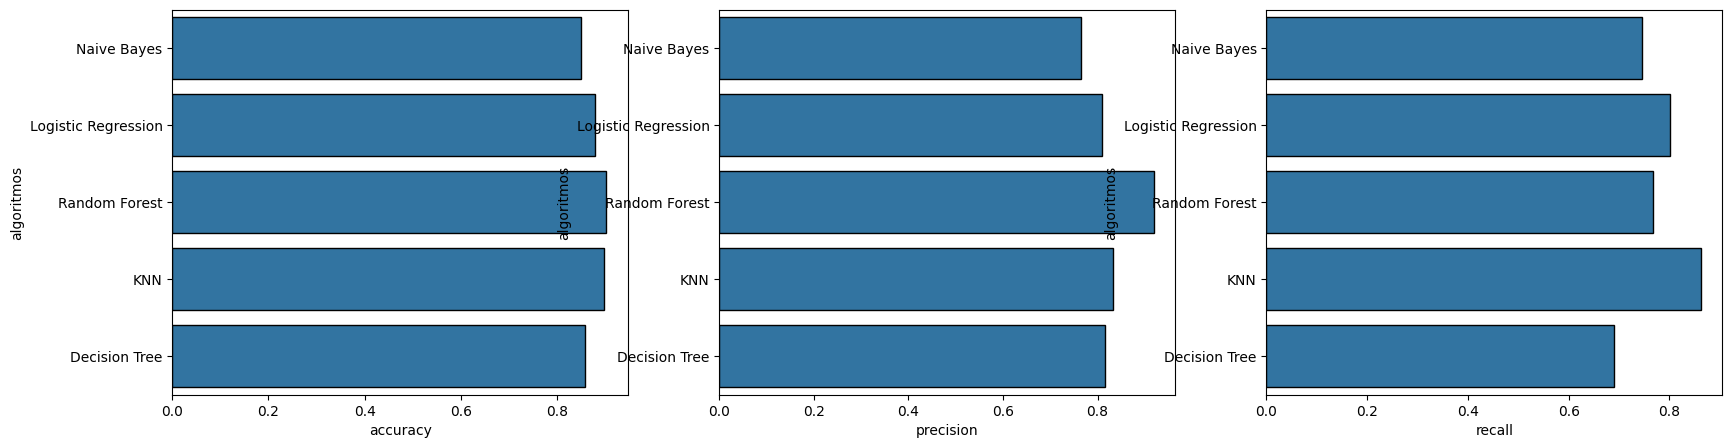

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=joined_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=joined_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=joined_results, ax=ax[2],ec='k',orient='h')

<Axes: xlabel='recall', ylabel='algoritmos'>

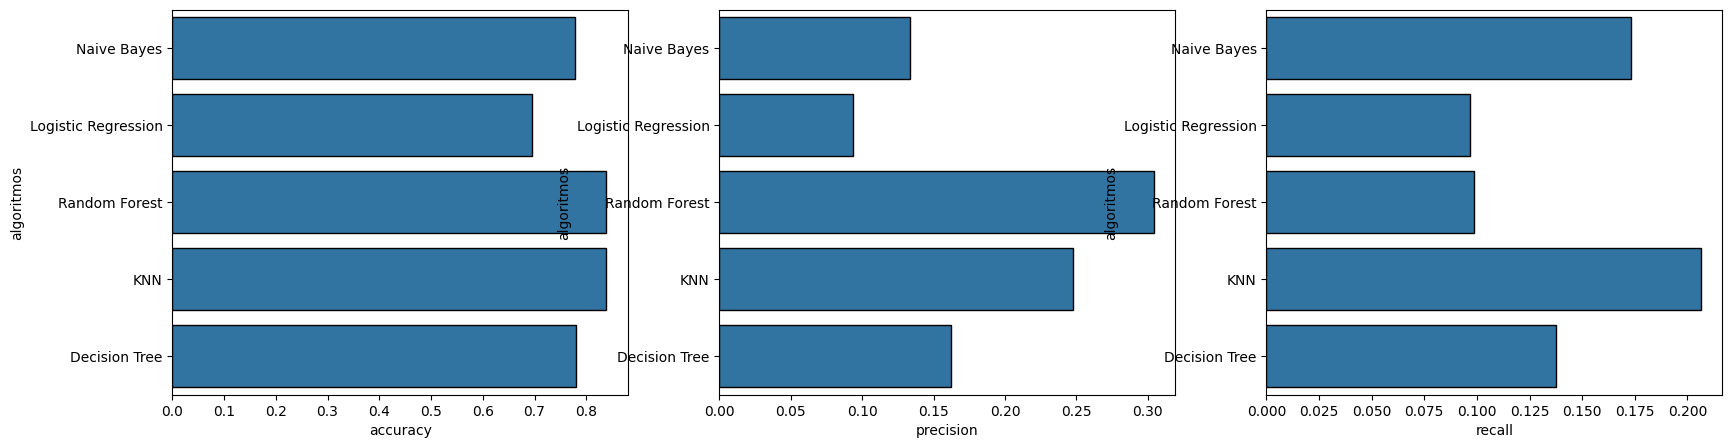

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=sep_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=sep_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=sep_results, ax=ax[2],ec='k',orient='h')

## Matriz de confusão

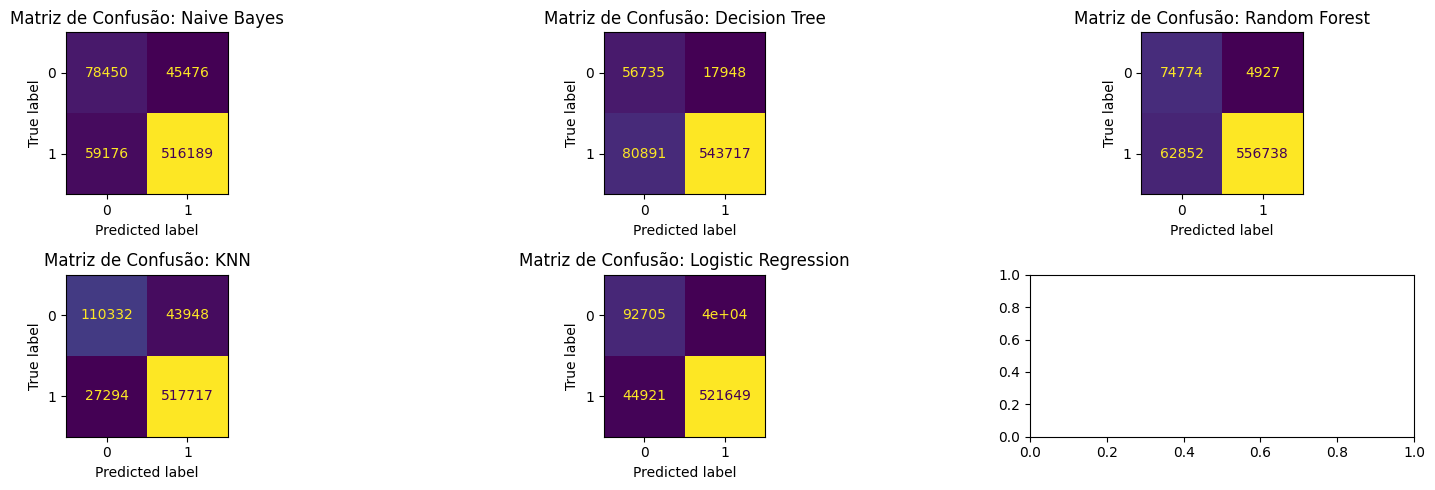

In [22]:
fig, ax = plt.subplots(nrows=2, ncols= 3, figsize=(15,5))

for idx,clf in enumerate(classificadores_joined.keys()):
    cf_matrix = confusion_matrix(classificadores_joined[clf].predict(dfs_joined[2]), dfs_joined[3])
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx%2][idx%3],colorbar=False)
    ax[idx%2][idx%3].set_title(f"Matriz de Confusão: {clf}")


plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'figure'

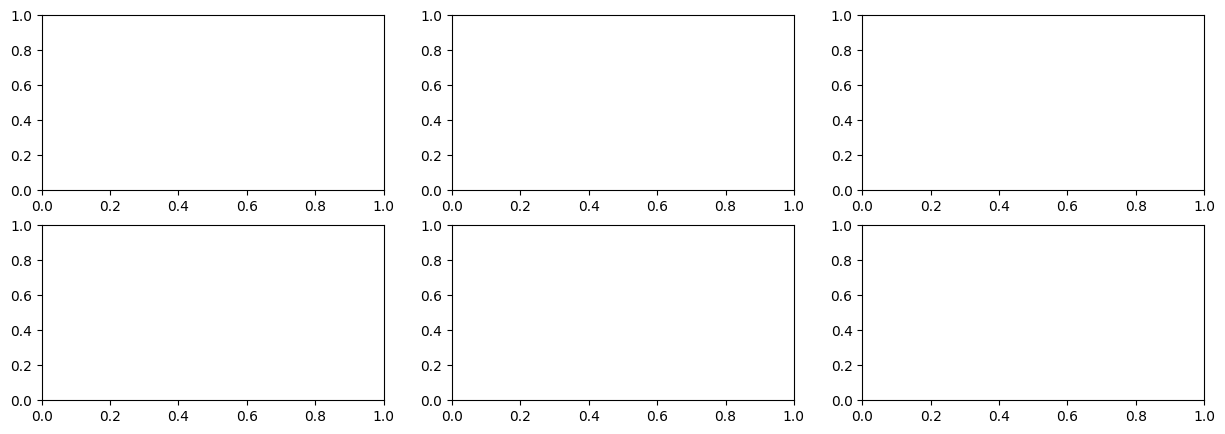

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,5))

for idx,clf in enumerate(classificadores_sep.keys()):
    cf_matrix = confusion_matrix(classificadores_sep[clf].predict(dfs_sep[2]), dfs_sep[3])
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx%2][idx%3],colorbar=False)
    ax[idx%2][idx%3].set_title(f"Matriz de Confusão: {clf}")

plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()

In [15]:
# print("Classification Report: \n", classification_report(,predicoes,zero_division=0))